In [1]:
#----Initialization----------------------
import numpy as np
import pandas as pd
import tensorflow
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import initializers
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
from scipy.special import softmax
from scipy import sparse
from scipy.optimize import leastsq
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import math
pi=math.pi
exp=math.exp

In [2]:
# mlp for multi-output regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense

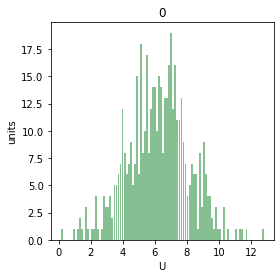

In [3]:
inp_up=np.loadtxt('Gfupin.dat') # input with 2,4,6 orbital 100 random U
inp_dw=np.loadtxt('Gfdwin.dat')
out_up=np.loadtxt('Gfupout.dat') # output with 8 orbital 100
out_dw=np.loadtxt('Gfdwout.dat')
#------------------To cross check we reshape-------------
Ginp_up=np.reshape(inp_up, (500,256*3), order='C')
Ginp_dw=np.reshape(inp_dw, (500,256*3),order='C')
Gout_up=np.reshape(out_up, (500,256),order='C')
Gout_dw=np.reshape(out_dw, (500,256),order='C')

tmp=np.reshape(Ginp_up,(500,256,3))
tmpdw=np.reshape(Ginp_dw,(500,256,3))

interaction=np.loadtxt('../U.dat')
dfint=pd.DataFrame(data=interaction)
dfint.hist(bins=100, grid=False, figsize=(4,4), color='#86bf91', zorder=2, rwidth=0.9)
plt.xlabel('U')
plt.ylabel("units")
plt.show()

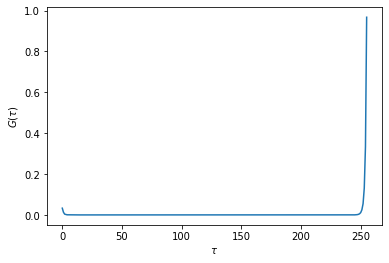

In [4]:
plt.plot(tmp[66,:,1])
plt.xlabel(r'$\tau$')
plt.ylabel(r'$G(\tau)$')
plt.show()

In [5]:
wn=np.arange(0,256)
x=wn
y=tmp[66,:,1]+0.0001

In [6]:
# Funtion fit using least square
def func2(params, x, y):
    a,b,c,d,e=params[0], params[1], params[2],params[3], params[4]
    residual=y-(a*np.exp(b*x**2-c*x-d)+e)
    return residual

In [7]:
params = [0, 0, 0, 0, 0]
result = leastsq(func2, params, (x, y),maxfev=20000)
a, b, c,d, e=result[0][0], result[0][1], result[0][2],result[0][3], result[0][4]
print(a,b,c,d,e)
yfit1=a*np.exp(b*x**2-c*x-d)+e

7.63410025619908e-61 0.003997471918049407 1.0061060756343603 -135.0104428656742 0.00021786313779430217


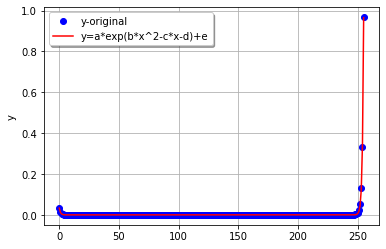

In [8]:
x=wn
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, color="red", label="y=a*exp(b*x^2-c*x-d)+e")
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [9]:
popt_f=[]
for i in range(500): 
    params = [0, 0, 0, 0, 0]
    ydata=tmp[i,:,0]+0.0001
    result = leastsq(func2, params, (wn, ydata),maxfev=20000)
    a, b, c, d, e=result[0][0], result[0][1], result[0][2],result[0][3], result[0][4]
    print(i)
    popt_f.append([a,b,c,d,e])

d2orb=pd.DataFrame(popt_f)   
d2orb.columns=['param02','param12','param22','param32','param42']

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [10]:
display(d2orb)

,param02,param12,param22,param32,param42
0,8.297853e-01,0.001816,0.464057,0.497294,0.024053
1,7.601405e-01,0.000756,0.194128,0.495411,0.023644
2,4.075360e-36,0.002477,0.621671,-78.849504,0.000387
3,6.273475e-01,0.001996,0.507642,0.489591,0.022702
4,8.068167e-20,0.001514,0.378932,-41.946047,0.000649
...,...,...,...,...,...
495,8.019946e-01,0.001620,0.413939,0.502549,0.025118
496,2.912930e-25,0.001817,0.455112,-54.274426,0.000540
497,1.307259e+00,0.001427,0.370685,0.480373,0.000690
498,6.224137e-01,0.001982,0.504295,0.479377,0.022824


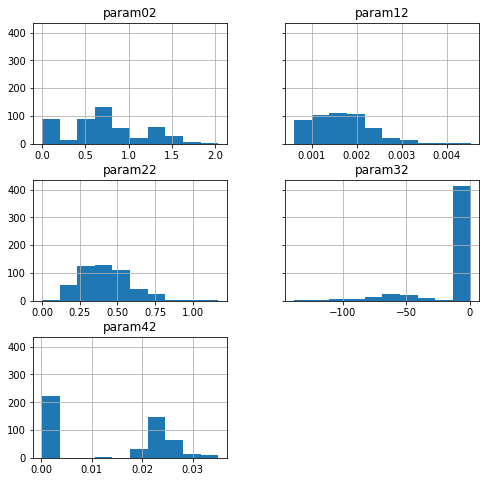

In [11]:
d2orb
#print(d2orb.describe())
d2orb.hist(column=["param02", "param12", "param22", "param32", "param42"], sharey=True, figsize=(8,8))
plt.show()

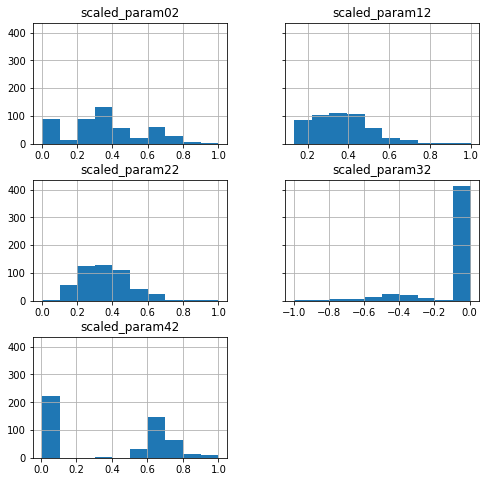

In [12]:
from sklearn.preprocessing import MaxAbsScaler
trans = MaxAbsScaler()
data = trans.fit_transform(d2orb)
data2=pd.DataFrame(data)
data2.columns=['scaled_param02','scaled_param12','scaled_param22','scaled_param32','scaled_param42']
data2.hist(column=['scaled_param02','scaled_param12','scaled_param22','scaled_param32','scaled_param42'],sharey=True, figsize=(8,8))
plt.show()

In [13]:
popt_f=[]
for i in range(500):
    params = [0, 0, 0, 0, 0]
    ydata=tmp[i,:,1]+0.001
    result = leastsq(func2, params, (wn, ydata), maxfev=20000)
    a, b, c,d, e=result[0][0], result[0][1], result[0][2],result[0][3], result[0][4]
    print(i)
    popt_f.append([a,b,c,d,e])
d4orb=pd.DataFrame(popt_f)
d4orb.columns=['param04','param14','param24','param34','param44']
d4orb

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

,param04,param14,param24,param34,param44
0,4.243333e-36,0.002466,0.618898,-78.817931,0.001315
1,7.317011e-01,0.000802,0.205160,0.491987,0.025700
2,1.634761e-36,0.002498,0.626841,-79.752437,0.001309
3,1.476489e+00,0.002761,0.714770,0.462798,0.001261
4,1.222850e-20,0.001551,0.388353,-43.809555,0.001567
...,...,...,...,...,...
495,5.147346e-32,0.002216,0.555737,-69.567616,0.001369
496,1.374751e+00,0.001848,0.479366,0.463824,0.001465
497,1.269077e+00,0.001466,0.380925,0.442293,0.001607
498,1.265091e+00,0.002734,0.707898,0.309610,0.001265


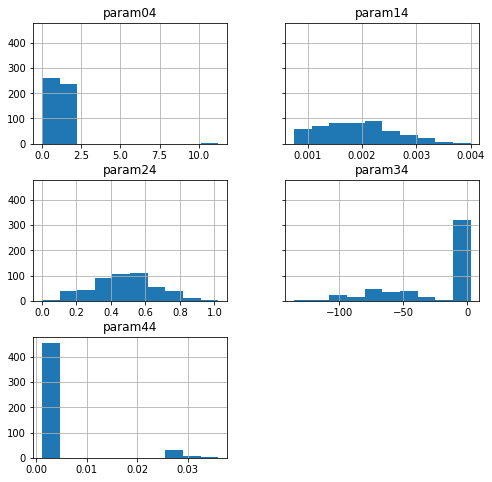

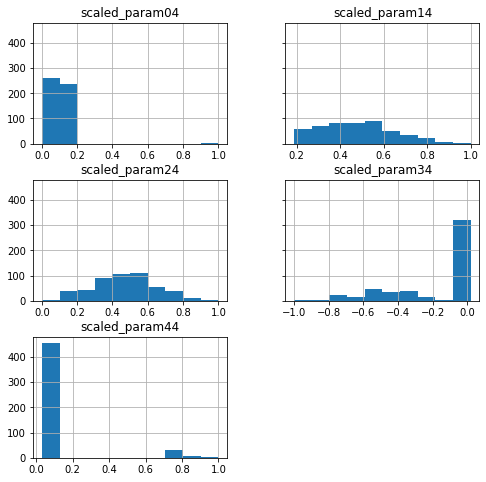

In [14]:
d4orb
#print(d4orb.describe())
d4orb.hist(column=["param04", "param14", "param24", "param34", "param44"], sharey=True, figsize=(8,8))
plt.show()
from sklearn.preprocessing import MaxAbsScaler
trans = MaxAbsScaler()
data = trans.fit_transform(d4orb)
data4=pd.DataFrame(data)
data4.columns=['scaled_param04','scaled_param14','scaled_param24','scaled_param34','scaled_param44']
data4.hist(column=['scaled_param04','scaled_param14','scaled_param24','scaled_param34','scaled_param44'],sharey=True, figsize=(8,8))
plt.show()

In [15]:
popt_f=[]
for i in range(500):
    params = [0, 0, 0, 0, 0]
    ydata=tmp[i,:,2]+0.0001
    result = leastsq(func2, params, (wn, ydata),maxfev=20000)
    a, b, c,d, e=result[0][0], result[0][1], result[0][2],result[0][3], result[0][4]
    print(i)
    popt_f.append([a,b,c,d,e])
d6orb=pd.DataFrame(popt_f)
d6orb.columns=['param06','param16','param26','param36','param46']
d6orb

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

,param06,param16,param26,param36,param46
0,1.361530,0.002465,0.638517,0.398560,0.000416
1,1.171832,0.001028,0.267442,0.478572,0.001154
2,1.445058,0.002497,0.646721,0.456073,0.000412
3,1.468707,0.002760,0.714529,0.457626,0.000363
4,1.354759,0.001549,0.402275,0.492659,0.000671
...,...,...,...,...,...
495,1.434232,0.002214,0.573861,0.469150,0.000473
496,1.378370,0.001845,0.478794,0.466828,0.000568
497,1.299771,0.001464,0.380286,0.466747,0.000710
498,1.169881,0.002733,0.707612,0.231481,0.000369


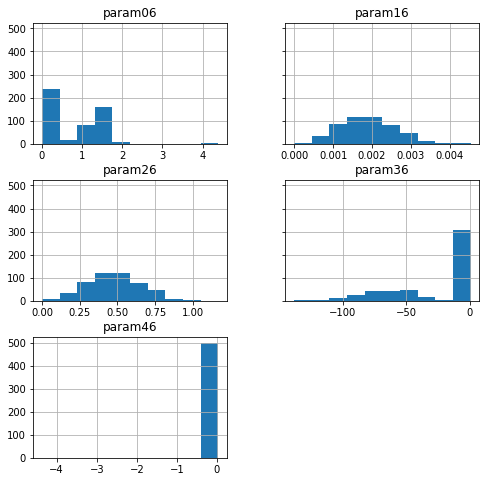

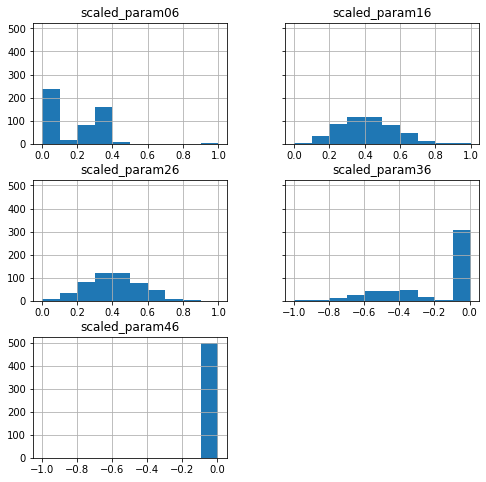

In [16]:
d6orb
#print(d6orb.describe())
d6orb.hist(column=["param06", "param16", "param26", "param36", "param46"], sharey=True, figsize=(8,8))
plt.show()
from sklearn.preprocessing import MaxAbsScaler
trans = MaxAbsScaler()
data = trans.fit_transform(d6orb)
data6=pd.DataFrame(data)
data6.columns=['scaled_param06','scaled_param16','scaled_param26','scaled_param36','scaled_param46']
data6.hist(column=['scaled_param06','scaled_param16','scaled_param26','scaled_param36','scaled_param46'],sharey=True, figsize=(8,8))
plt.show()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

array([[<AxesSubplot:title={'center':'param08'}>]], dtype=object)

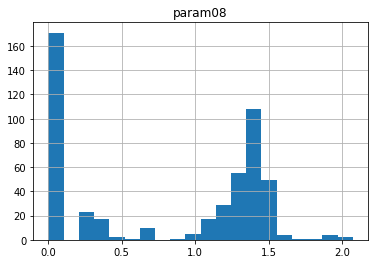

In [17]:
popt_f=[]
for i in range(500):
    params = [0, 0, 0, 0, 0]
    ydata=Gout_up[i,:]+0.0001
    result = leastsq(func2, params, (wn, ydata),maxfev=20000)
    a, b, c,d, e=result[0][0], result[0][1], result[0][2],result[0][3], result[0][4]
    print(i)
    popt_f.append([a,b,c,d,e])
d8orb=pd.DataFrame(popt_f)
d8orb.columns=['param08','param18','param28','param38','param48']
d8orb.hist(column='param08',bins=20)

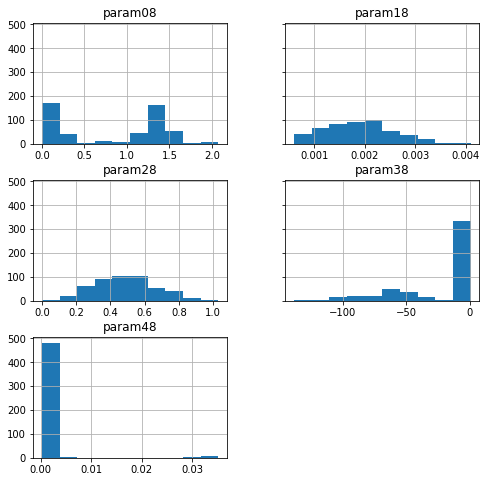

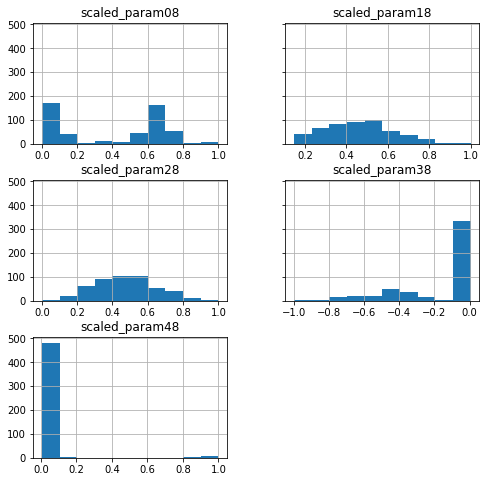

In [18]:
d8orb
#print(d8orb.describe())
d8orb.hist(column=["param08", "param18", "param28", "param38", "param48"], sharey=True, figsize=(8,8))
plt.show()
from sklearn.preprocessing import MaxAbsScaler
trans = MaxAbsScaler()
data = trans.fit_transform(d8orb)
data8=pd.DataFrame(data)
data8.columns=['scaled_param08','scaled_param18','scaled_param28','scaled_param38','scaled_param48']
data8.hist(column=['scaled_param08','scaled_param18','scaled_param28','scaled_param38','scaled_param48'],sharey=True, figsize=(8,8))
plt.show()

In [19]:
Gin = pd.concat([data2, data4,data6], axis=1)
Gin_t=pd.concat([d2orb, d4orb,d6orb], axis=1)
X=Gin.to_numpy()
X_t=Gin_t.to_numpy()
y=data8.to_numpy()
print(y.shape[0])

500


In [20]:
print(X.shape, y.shape)
X_train=X[0:400,:]
X_test=X[400:500,:]
X_test_t=X_t[400:500,:]
y_train=y[0:400,:]
y_test=y[400:500,:]
print(y_train.shape)

(500, 15) (500, 5)
(400, 5)


In [ ]:
def wider_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=15, kernel_initializer='normal', activation='relu'))
    model.add(Dense(5, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# evaluate model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=wider_model, epochs=10, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Wider: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [29]:
X_train, X_test, y_train, y_test = train_test_split(Gin, data8, test_size=0.1, random_state=0)
X_test.shape

(50, 15)

In [31]:
from keras.layers import GaussianNoise
from tensorflow.keras.regularizers import l2

values = [1e-4]
all_train, all_test = list(), list()
for params in values:
    model = Sequential()
    model.add(Dense(10, activation = 'relu',input_shape=(15,)))
    model.add(Dense(5, activation = 'relu'))
    model.add(Dense(5))
    #model.compile(loss = 'mse', optimizer = RMSprop(), metrics = ['accuracy'])
    model.compile(loss = 'mae', optimizer = 'adam', metrics = ['accuracy'])
    history = model.fit(X_train, y_train, batch_size=20, epochs = 2000, verbose = 1, validation_data=(X_test,y_test))
    _, train_acc = model.evaluate(X_train, y_train, verbose=0)
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print('Param: %f, Train: %.3f, Test: %.3f' % (params, train_acc, test_acc))
    all_train.append(train_acc)
    all_test.append(test_acc)  

Epoch 1/2000
23/23 [==============================] - 1s 11ms/step - loss: 0.2985 - accuracy: 0.3978 - val_loss: 0.2993 - val_accuracy: 0.3600
Epoch 2/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.2857 - accuracy: 0.4222 - val_loss: 0.2882 - val_accuracy: 0.3600
Epoch 3/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.2756 - accuracy: 0.4222 - val_loss: 0.2777 - val_accuracy: 0.3600
Epoch 4/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.2655 - accuracy: 0.4222 - val_loss: 0.2673 - val_accuracy: 0.3600
Epoch 5/2000
23/23 [==============================] - 0s 4ms/step - loss: 0.2555 - accuracy: 0.4222 - val_loss: 0.2566 - val_accuracy: 0.3600
Epoch 6/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.2452 - accuracy: 0.4222 - val_loss: 0.2461 - val_accuracy: 0.3600
Epoch 7/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.2351 - accuracy: 0.4222 - val_loss: 0.2357 - val_accuracy: 0.3600
Epoch

23/23 [==============================] - 0s 3ms/step - loss: 0.1052 - accuracy: 0.4111 - val_loss: 0.0996 - val_accuracy: 0.4600
Epoch 59/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.1049 - accuracy: 0.4133 - val_loss: 0.0996 - val_accuracy: 0.4600
Epoch 60/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.1047 - accuracy: 0.4178 - val_loss: 0.0990 - val_accuracy: 0.4600
Epoch 61/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.1044 - accuracy: 0.4200 - val_loss: 0.0989 - val_accuracy: 0.4600
Epoch 62/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.1043 - accuracy: 0.4289 - val_loss: 0.0990 - val_accuracy: 0.4600
Epoch 63/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.1040 - accuracy: 0.4400 - val_loss: 0.0984 - val_accuracy: 0.4600
Epoch 64/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.1038 - accuracy: 0.4422 - val_loss: 0.0983 - val_accuracy: 0.4800
Epoch 65/2000

23/23 [==============================] - 0s 3ms/step - loss: 0.1000 - accuracy: 0.5200 - val_loss: 0.0946 - val_accuracy: 0.5400
Epoch 116/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0998 - accuracy: 0.5200 - val_loss: 0.0944 - val_accuracy: 0.5600
Epoch 117/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0998 - accuracy: 0.5200 - val_loss: 0.0944 - val_accuracy: 0.5600
Epoch 118/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0997 - accuracy: 0.5200 - val_loss: 0.0942 - val_accuracy: 0.5600
Epoch 119/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0997 - accuracy: 0.5200 - val_loss: 0.0943 - val_accuracy: 0.5600
Epoch 120/2000
23/23 [==============================] - 0s 4ms/step - loss: 0.0997 - accuracy: 0.5222 - val_loss: 0.0944 - val_accuracy: 0.5800
Epoch 121/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0998 - accuracy: 0.5222 - val_loss: 0.0943 - val_accuracy: 0.5600
Epoch 1

Epoch 172/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0983 - accuracy: 0.5244 - val_loss: 0.0926 - val_accuracy: 0.5600
Epoch 173/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0984 - accuracy: 0.5267 - val_loss: 0.0930 - val_accuracy: 0.5800
Epoch 174/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0982 - accuracy: 0.5222 - val_loss: 0.0925 - val_accuracy: 0.5600
Epoch 175/2000
23/23 [==============================] - 0s 4ms/step - loss: 0.0980 - accuracy: 0.5244 - val_loss: 0.0925 - val_accuracy: 0.5400
Epoch 176/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0981 - accuracy: 0.5222 - val_loss: 0.0923 - val_accuracy: 0.5600
Epoch 177/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0981 - accuracy: 0.5244 - val_loss: 0.0922 - val_accuracy: 0.5800
Epoch 178/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0981 - accuracy: 0.5267 - val_loss: 0.0923 - val_accuracy:

Epoch 229/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0964 - accuracy: 0.5267 - val_loss: 0.0855 - val_accuracy: 0.6000
Epoch 230/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0963 - accuracy: 0.5244 - val_loss: 0.0858 - val_accuracy: 0.6000
Epoch 231/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0963 - accuracy: 0.5200 - val_loss: 0.0856 - val_accuracy: 0.6000
Epoch 232/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0967 - accuracy: 0.5289 - val_loss: 0.0855 - val_accuracy: 0.6000
Epoch 233/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0971 - accuracy: 0.5156 - val_loss: 0.0854 - val_accuracy: 0.6000
Epoch 234/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0965 - accuracy: 0.5244 - val_loss: 0.0848 - val_accuracy: 0.6000
Epoch 235/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0962 - accuracy: 0.5200 - val_loss: 0.0849 - val_accuracy:

Epoch 286/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0950 - accuracy: 0.5222 - val_loss: 0.0845 - val_accuracy: 0.6000
Epoch 287/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0952 - accuracy: 0.5267 - val_loss: 0.0839 - val_accuracy: 0.6200
Epoch 288/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0952 - accuracy: 0.5311 - val_loss: 0.0848 - val_accuracy: 0.6000
Epoch 289/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0952 - accuracy: 0.5244 - val_loss: 0.0845 - val_accuracy: 0.6000
Epoch 290/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0951 - accuracy: 0.5244 - val_loss: 0.0844 - val_accuracy: 0.6000
Epoch 291/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0955 - accuracy: 0.5222 - val_loss: 0.0842 - val_accuracy: 0.6200
Epoch 292/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0953 - accuracy: 0.5311 - val_loss: 0.0842 - val_accuracy:

Epoch 343/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0948 - accuracy: 0.5200 - val_loss: 0.0844 - val_accuracy: 0.6200
Epoch 344/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0952 - accuracy: 0.5311 - val_loss: 0.0848 - val_accuracy: 0.6200
Epoch 345/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0952 - accuracy: 0.5333 - val_loss: 0.0844 - val_accuracy: 0.6200
Epoch 346/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0947 - accuracy: 0.5222 - val_loss: 0.0841 - val_accuracy: 0.6200
Epoch 347/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0950 - accuracy: 0.5222 - val_loss: 0.0845 - val_accuracy: 0.6200
Epoch 348/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0949 - accuracy: 0.5222 - val_loss: 0.0843 - val_accuracy: 0.6200
Epoch 349/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0952 - accuracy: 0.5289 - val_loss: 0.0842 - val_accuracy:

Epoch 400/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0944 - accuracy: 0.5156 - val_loss: 0.0843 - val_accuracy: 0.6200
Epoch 401/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0947 - accuracy: 0.5222 - val_loss: 0.0844 - val_accuracy: 0.6200
Epoch 402/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0944 - accuracy: 0.5222 - val_loss: 0.0842 - val_accuracy: 0.6200
Epoch 403/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0944 - accuracy: 0.5267 - val_loss: 0.0841 - val_accuracy: 0.6200
Epoch 404/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0943 - accuracy: 0.5244 - val_loss: 0.0847 - val_accuracy: 0.6200
Epoch 405/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0946 - accuracy: 0.5244 - val_loss: 0.0843 - val_accuracy: 0.6200
Epoch 406/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0945 - accuracy: 0.5200 - val_loss: 0.0843 - val_accuracy:

Epoch 457/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0945 - accuracy: 0.5133 - val_loss: 0.0839 - val_accuracy: 0.6200
Epoch 458/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0946 - accuracy: 0.5222 - val_loss: 0.0840 - val_accuracy: 0.6200
Epoch 459/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0945 - accuracy: 0.5244 - val_loss: 0.0838 - val_accuracy: 0.6200
Epoch 460/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0942 - accuracy: 0.5333 - val_loss: 0.0840 - val_accuracy: 0.6200
Epoch 461/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0945 - accuracy: 0.5244 - val_loss: 0.0842 - val_accuracy: 0.6200
Epoch 462/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0943 - accuracy: 0.5311 - val_loss: 0.0838 - val_accuracy: 0.6200
Epoch 463/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0944 - accuracy: 0.5222 - val_loss: 0.0835 - val_accuracy:

Epoch 514/2000
23/23 [==============================] - 0s 4ms/step - loss: 0.0944 - accuracy: 0.5178 - val_loss: 0.0836 - val_accuracy: 0.6000
Epoch 515/2000
23/23 [==============================] - ETA: 0s - loss: 0.1099 - accuracy: 0.50 - 0s 4ms/step - loss: 0.0940 - accuracy: 0.5178 - val_loss: 0.0833 - val_accuracy: 0.6000
Epoch 516/2000
23/23 [==============================] - 0s 4ms/step - loss: 0.0941 - accuracy: 0.5200 - val_loss: 0.0833 - val_accuracy: 0.6000
Epoch 517/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0942 - accuracy: 0.5178 - val_loss: 0.0834 - val_accuracy: 0.6000
Epoch 518/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0942 - accuracy: 0.5200 - val_loss: 0.0837 - val_accuracy: 0.6000
Epoch 519/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0940 - accuracy: 0.5267 - val_loss: 0.0833 - val_accuracy: 0.6000
Epoch 520/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0943 - accuracy:

23/23 [==============================] - 0s 3ms/step - loss: 0.0940 - accuracy: 0.5311 - val_loss: 0.0832 - val_accuracy: 0.6200
Epoch 571/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0938 - accuracy: 0.5222 - val_loss: 0.0834 - val_accuracy: 0.6200
Epoch 572/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0940 - accuracy: 0.5267 - val_loss: 0.0830 - val_accuracy: 0.6200
Epoch 573/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0937 - accuracy: 0.5311 - val_loss: 0.0829 - val_accuracy: 0.6200
Epoch 574/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0939 - accuracy: 0.5267 - val_loss: 0.0829 - val_accuracy: 0.6200
Epoch 575/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0941 - accuracy: 0.5222 - val_loss: 0.0829 - val_accuracy: 0.6200
Epoch 576/2000
23/23 [==============================] - 0s 5ms/step - loss: 0.0938 - accuracy: 0.5222 - val_loss: 0.0831 - val_accuracy: 0.6200
Epoch 5

Epoch 627/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0939 - accuracy: 0.5200 - val_loss: 0.0825 - val_accuracy: 0.6000
Epoch 628/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0934 - accuracy: 0.5200 - val_loss: 0.0828 - val_accuracy: 0.6200
Epoch 629/2000
23/23 [==============================] - 0s 4ms/step - loss: 0.0941 - accuracy: 0.5200 - val_loss: 0.0823 - val_accuracy: 0.6200
Epoch 630/2000
23/23 [==============================] - 0s 4ms/step - loss: 0.0936 - accuracy: 0.5244 - val_loss: 0.0825 - val_accuracy: 0.6200
Epoch 631/2000
23/23 [==============================] - 0s 4ms/step - loss: 0.0936 - accuracy: 0.5222 - val_loss: 0.0823 - val_accuracy: 0.6200
Epoch 632/2000
23/23 [==============================] - 0s 5ms/step - loss: 0.0941 - accuracy: 0.5267 - val_loss: 0.0823 - val_accuracy: 0.6200
Epoch 633/2000
23/23 [==============================] - 0s 5ms/step - loss: 0.0939 - accuracy: 0.5267 - val_loss: 0.0829 - val_accuracy:

Epoch 684/2000
23/23 [==============================] - 0s 4ms/step - loss: 0.0935 - accuracy: 0.5267 - val_loss: 0.0827 - val_accuracy: 0.6200
Epoch 685/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0936 - accuracy: 0.5200 - val_loss: 0.0830 - val_accuracy: 0.6000
Epoch 686/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0934 - accuracy: 0.5178 - val_loss: 0.0822 - val_accuracy: 0.6000
Epoch 687/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0937 - accuracy: 0.5200 - val_loss: 0.0823 - val_accuracy: 0.6000
Epoch 688/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0936 - accuracy: 0.5222 - val_loss: 0.0819 - val_accuracy: 0.6000
Epoch 689/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0939 - accuracy: 0.5200 - val_loss: 0.0822 - val_accuracy: 0.6000
Epoch 690/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0936 - accuracy: 0.5222 - val_loss: 0.0825 - val_accuracy:

Epoch 741/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0939 - accuracy: 0.5222 - val_loss: 0.0824 - val_accuracy: 0.6200
Epoch 742/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0934 - accuracy: 0.5222 - val_loss: 0.0822 - val_accuracy: 0.6200
Epoch 743/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0935 - accuracy: 0.5222 - val_loss: 0.0825 - val_accuracy: 0.6200
Epoch 744/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0933 - accuracy: 0.5244 - val_loss: 0.0820 - val_accuracy: 0.6200
Epoch 745/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.5289 - val_loss: 0.0818 - val_accuracy: 0.6200
Epoch 746/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.5289 - val_loss: 0.0815 - val_accuracy: 0.6200
Epoch 747/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.5289 - val_loss: 0.0818 - val_accuracy:

23/23 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.5289 - val_loss: 0.0826 - val_accuracy: 0.6400
Epoch 798/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0933 - accuracy: 0.5267 - val_loss: 0.0814 - val_accuracy: 0.6200
Epoch 799/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0934 - accuracy: 0.5222 - val_loss: 0.0827 - val_accuracy: 0.6200
Epoch 800/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0932 - accuracy: 0.5200 - val_loss: 0.0833 - val_accuracy: 0.6400
Epoch 801/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0935 - accuracy: 0.5289 - val_loss: 0.0812 - val_accuracy: 0.6200
Epoch 802/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0937 - accuracy: 0.5244 - val_loss: 0.0830 - val_accuracy: 0.6400
Epoch 803/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0941 - accuracy: 0.5311 - val_loss: 0.0826 - val_accuracy: 0.6400
Epoch 8

Epoch 854/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0931 - accuracy: 0.5222 - val_loss: 0.0818 - val_accuracy: 0.6000
Epoch 855/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0932 - accuracy: 0.5200 - val_loss: 0.0836 - val_accuracy: 0.6200
Epoch 856/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0931 - accuracy: 0.5200 - val_loss: 0.0811 - val_accuracy: 0.6000
Epoch 857/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0932 - accuracy: 0.5200 - val_loss: 0.0833 - val_accuracy: 0.6200
Epoch 858/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0932 - accuracy: 0.5200 - val_loss: 0.0820 - val_accuracy: 0.6200
Epoch 859/2000
23/23 [==============================] - 0s 4ms/step - loss: 0.0939 - accuracy: 0.5222 - val_loss: 0.0825 - val_accuracy: 0.6400
Epoch 860/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0933 - accuracy: 0.5200 - val_loss: 0.0813 - val_accuracy:

Epoch 911/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0929 - accuracy: 0.5244 - val_loss: 0.0815 - val_accuracy: 0.6200
Epoch 912/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.5222 - val_loss: 0.0815 - val_accuracy: 0.6400
Epoch 913/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0929 - accuracy: 0.5244 - val_loss: 0.0823 - val_accuracy: 0.6400
Epoch 914/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0929 - accuracy: 0.5200 - val_loss: 0.0810 - val_accuracy: 0.6200
Epoch 915/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0929 - accuracy: 0.5244 - val_loss: 0.0814 - val_accuracy: 0.6200
Epoch 916/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0929 - accuracy: 0.5244 - val_loss: 0.0823 - val_accuracy: 0.6200
Epoch 917/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0931 - accuracy: 0.5200 - val_loss: 0.0829 - val_accuracy:

Epoch 968/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0931 - accuracy: 0.5267 - val_loss: 0.0829 - val_accuracy: 0.6200
Epoch 969/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0937 - accuracy: 0.5289 - val_loss: 0.0807 - val_accuracy: 0.6000
Epoch 970/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0927 - accuracy: 0.5222 - val_loss: 0.0818 - val_accuracy: 0.6200
Epoch 971/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.5311 - val_loss: 0.0815 - val_accuracy: 0.6200
Epoch 972/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.5356 - val_loss: 0.0822 - val_accuracy: 0.6200
Epoch 973/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.5267 - val_loss: 0.0816 - val_accuracy: 0.6200
Epoch 974/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0932 - accuracy: 0.5222 - val_loss: 0.0833 - val_accuracy:

Epoch 1025/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.5267 - val_loss: 0.0800 - val_accuracy: 0.6000
Epoch 1026/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0933 - accuracy: 0.5267 - val_loss: 0.0818 - val_accuracy: 0.6200
Epoch 1027/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.5333 - val_loss: 0.0820 - val_accuracy: 0.6400
Epoch 1028/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.5267 - val_loss: 0.0818 - val_accuracy: 0.6200
Epoch 1029/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.5222 - val_loss: 0.0815 - val_accuracy: 0.6000
Epoch 1030/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0929 - accuracy: 0.5244 - val_loss: 0.0818 - val_accuracy: 0.6200
Epoch 1031/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0927 - accuracy: 0.5244 - val_loss: 0.0830 - val_ac

23/23 [==============================] - 0s 2ms/step - loss: 0.0927 - accuracy: 0.5222 - val_loss: 0.0803 - val_accuracy: 0.6200
Epoch 1082/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0931 - accuracy: 0.5222 - val_loss: 0.0820 - val_accuracy: 0.6400
Epoch 1083/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0927 - accuracy: 0.5311 - val_loss: 0.0801 - val_accuracy: 0.6000
Epoch 1084/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0929 - accuracy: 0.5200 - val_loss: 0.0805 - val_accuracy: 0.6200
Epoch 1085/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.5244 - val_loss: 0.0816 - val_accuracy: 0.6200
Epoch 1086/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0929 - accuracy: 0.5200 - val_loss: 0.0808 - val_accuracy: 0.6200
Epoch 1087/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.5289 - val_loss: 0.0820 - val_accuracy: 0.6400
E

23/23 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.5267 - val_loss: 0.0812 - val_accuracy: 0.6400
Epoch 1138/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.5267 - val_loss: 0.0818 - val_accuracy: 0.6400
Epoch 1139/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0927 - accuracy: 0.5222 - val_loss: 0.0802 - val_accuracy: 0.6000
Epoch 1140/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.5311 - val_loss: 0.0822 - val_accuracy: 0.6400
Epoch 1141/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.5289 - val_loss: 0.0807 - val_accuracy: 0.6400
Epoch 1142/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0925 - accuracy: 0.5333 - val_loss: 0.0809 - val_accuracy: 0.6400
Epoch 1143/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0925 - accuracy: 0.5267 - val_loss: 0.0820 - val_accuracy: 0.6400
E

23/23 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.5200 - val_loss: 0.0815 - val_accuracy: 0.6200
Epoch 1194/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0924 - accuracy: 0.5289 - val_loss: 0.0812 - val_accuracy: 0.6400
Epoch 1195/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.5289 - val_loss: 0.0817 - val_accuracy: 0.6400
Epoch 1196/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.5289 - val_loss: 0.0817 - val_accuracy: 0.6400
Epoch 1197/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.5267 - val_loss: 0.0804 - val_accuracy: 0.6000
Epoch 1198/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.5222 - val_loss: 0.0810 - val_accuracy: 0.6000
Epoch 1199/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.5222 - val_loss: 0.0801 - val_accuracy: 0.6200
E

23/23 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.5244 - val_loss: 0.0839 - val_accuracy: 0.6400
Epoch 1250/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0929 - accuracy: 0.5267 - val_loss: 0.0803 - val_accuracy: 0.6000
Epoch 1251/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0929 - accuracy: 0.5222 - val_loss: 0.0828 - val_accuracy: 0.6400
Epoch 1252/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0929 - accuracy: 0.5333 - val_loss: 0.0801 - val_accuracy: 0.5800
Epoch 1253/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.5267 - val_loss: 0.0814 - val_accuracy: 0.6400
Epoch 1254/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.5267 - val_loss: 0.0808 - val_accuracy: 0.6200
Epoch 1255/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.5267 - val_loss: 0.0808 - val_accuracy: 0.6000
E

23/23 [==============================] - 0s 2ms/step - loss: 0.0924 - accuracy: 0.5356 - val_loss: 0.0813 - val_accuracy: 0.6400
Epoch 1306/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0924 - accuracy: 0.5400 - val_loss: 0.0811 - val_accuracy: 0.6200
Epoch 1307/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0924 - accuracy: 0.5244 - val_loss: 0.0809 - val_accuracy: 0.6200
Epoch 1308/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0924 - accuracy: 0.5289 - val_loss: 0.0809 - val_accuracy: 0.6000
Epoch 1309/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0927 - accuracy: 0.5267 - val_loss: 0.0810 - val_accuracy: 0.6200
Epoch 1310/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0924 - accuracy: 0.5289 - val_loss: 0.0807 - val_accuracy: 0.6200
Epoch 1311/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0923 - accuracy: 0.5222 - val_loss: 0.0808 - val_accuracy: 0.6000
E

23/23 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.5311 - val_loss: 0.0816 - val_accuracy: 0.6200
Epoch 1362/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.5356 - val_loss: 0.0813 - val_accuracy: 0.6200
Epoch 1363/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.5333 - val_loss: 0.0815 - val_accuracy: 0.6200
Epoch 1364/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0924 - accuracy: 0.5267 - val_loss: 0.0810 - val_accuracy: 0.6200
Epoch 1365/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.5267 - val_loss: 0.0810 - val_accuracy: 0.6000
Epoch 1366/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.5244 - val_loss: 0.0813 - val_accuracy: 0.6200
Epoch 1367/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.5333 - val_loss: 0.0808 - val_accuracy: 0.6000
E

23/23 [==============================] - 0s 3ms/step - loss: 0.0927 - accuracy: 0.5444 - val_loss: 0.0818 - val_accuracy: 0.6400
Epoch 1418/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0924 - accuracy: 0.5311 - val_loss: 0.0808 - val_accuracy: 0.6200
Epoch 1419/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.5222 - val_loss: 0.0813 - val_accuracy: 0.6200
Epoch 1420/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0924 - accuracy: 0.5356 - val_loss: 0.0811 - val_accuracy: 0.6000
Epoch 1421/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0929 - accuracy: 0.5222 - val_loss: 0.0814 - val_accuracy: 0.6200
Epoch 1422/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.5267 - val_loss: 0.0811 - val_accuracy: 0.6200
Epoch 1423/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0924 - accuracy: 0.5311 - val_loss: 0.0808 - val_accuracy: 0.6200
E

23/23 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.5378 - val_loss: 0.0809 - val_accuracy: 0.6200
Epoch 1474/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.5400 - val_loss: 0.0809 - val_accuracy: 0.6200
Epoch 1475/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.5422 - val_loss: 0.0808 - val_accuracy: 0.6200
Epoch 1476/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.5356 - val_loss: 0.0813 - val_accuracy: 0.6200
Epoch 1477/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0924 - accuracy: 0.5400 - val_loss: 0.0807 - val_accuracy: 0.6200
Epoch 1478/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.5356 - val_loss: 0.0812 - val_accuracy: 0.6200
Epoch 1479/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.5467 - val_loss: 0.0808 - val_accuracy: 0.6200
E

23/23 [==============================] - 0s 2ms/step - loss: 0.0924 - accuracy: 0.5311 - val_loss: 0.0807 - val_accuracy: 0.6200
Epoch 1530/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0922 - accuracy: 0.5289 - val_loss: 0.0813 - val_accuracy: 0.6000
Epoch 1531/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0922 - accuracy: 0.5244 - val_loss: 0.0809 - val_accuracy: 0.6000
Epoch 1532/2000
23/23 [==============================] - 0s 5ms/step - loss: 0.0929 - accuracy: 0.5333 - val_loss: 0.0812 - val_accuracy: 0.6200
Epoch 1533/2000
23/23 [==============================] - 0s 3ms/step - loss: 0.0923 - accuracy: 0.5378 - val_loss: 0.0812 - val_accuracy: 0.6200
Epoch 1534/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.5356 - val_loss: 0.0803 - val_accuracy: 0.6000
Epoch 1535/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.5333 - val_loss: 0.0805 - val_accuracy: 0.6200
E

23/23 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.5333 - val_loss: 0.0803 - val_accuracy: 0.6200
Epoch 1586/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.5400 - val_loss: 0.0806 - val_accuracy: 0.6200
Epoch 1587/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.5422 - val_loss: 0.0805 - val_accuracy: 0.6000
Epoch 1588/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.5333 - val_loss: 0.0807 - val_accuracy: 0.6200
Epoch 1589/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.5467 - val_loss: 0.0808 - val_accuracy: 0.6000
Epoch 1590/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.5333 - val_loss: 0.0806 - val_accuracy: 0.6200
Epoch 1591/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.5356 - val_loss: 0.0811 - val_accuracy: 0.6200
E

23/23 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.5289 - val_loss: 0.0804 - val_accuracy: 0.6200
Epoch 1642/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.5289 - val_loss: 0.0806 - val_accuracy: 0.6200
Epoch 1643/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.5378 - val_loss: 0.0806 - val_accuracy: 0.6200
Epoch 1644/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.5289 - val_loss: 0.0804 - val_accuracy: 0.6200
Epoch 1645/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.5333 - val_loss: 0.0804 - val_accuracy: 0.6000
Epoch 1646/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0920 - accuracy: 0.5311 - val_loss: 0.0805 - val_accuracy: 0.6200
Epoch 1647/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.5378 - val_loss: 0.0803 - val_accuracy: 0.6000
E

23/23 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.5378 - val_loss: 0.0804 - val_accuracy: 0.6000
Epoch 1698/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.5378 - val_loss: 0.0806 - val_accuracy: 0.6200
Epoch 1699/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.5400 - val_loss: 0.0810 - val_accuracy: 0.6000
Epoch 1700/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0924 - accuracy: 0.5444 - val_loss: 0.0804 - val_accuracy: 0.6200
Epoch 1701/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0920 - accuracy: 0.5378 - val_loss: 0.0804 - val_accuracy: 0.6200
Epoch 1702/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0920 - accuracy: 0.5378 - val_loss: 0.0802 - val_accuracy: 0.6000
Epoch 1703/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.5444 - val_loss: 0.0805 - val_accuracy: 0.6200
E

23/23 [==============================] - 0s 2ms/step - loss: 0.0924 - accuracy: 0.5333 - val_loss: 0.0807 - val_accuracy: 0.6200
Epoch 1754/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.5400 - val_loss: 0.0803 - val_accuracy: 0.6000
Epoch 1755/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.5356 - val_loss: 0.0805 - val_accuracy: 0.6200
Epoch 1756/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0920 - accuracy: 0.5444 - val_loss: 0.0804 - val_accuracy: 0.6000
Epoch 1757/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.5333 - val_loss: 0.0803 - val_accuracy: 0.6200
Epoch 1758/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.5356 - val_loss: 0.0804 - val_accuracy: 0.6200
Epoch 1759/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.5333 - val_loss: 0.0804 - val_accuracy: 0.6200
E

23/23 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.5333 - val_loss: 0.0805 - val_accuracy: 0.6200
Epoch 1810/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.5400 - val_loss: 0.0808 - val_accuracy: 0.6200
Epoch 1811/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.5444 - val_loss: 0.0805 - val_accuracy: 0.6200
Epoch 1812/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.5467 - val_loss: 0.0804 - val_accuracy: 0.6200
Epoch 1813/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0920 - accuracy: 0.5378 - val_loss: 0.0805 - val_accuracy: 0.6200
Epoch 1814/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.5489 - val_loss: 0.0805 - val_accuracy: 0.6200
Epoch 1815/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.5467 - val_loss: 0.0806 - val_accuracy: 0.6200
E

23/23 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.5311 - val_loss: 0.0804 - val_accuracy: 0.6000
Epoch 1866/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.5311 - val_loss: 0.0803 - val_accuracy: 0.6000
Epoch 1867/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.5289 - val_loss: 0.0802 - val_accuracy: 0.6000
Epoch 1868/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.5311 - val_loss: 0.0803 - val_accuracy: 0.6000
Epoch 1869/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0920 - accuracy: 0.5311 - val_loss: 0.0804 - val_accuracy: 0.6200
Epoch 1870/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0920 - accuracy: 0.5333 - val_loss: 0.0804 - val_accuracy: 0.6200
Epoch 1871/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.5444 - val_loss: 0.0804 - val_accuracy: 0.6000
E

23/23 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.5533 - val_loss: 0.0803 - val_accuracy: 0.6200
Epoch 1922/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.5467 - val_loss: 0.0805 - val_accuracy: 0.6400
Epoch 1923/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0926 - accuracy: 0.5444 - val_loss: 0.0801 - val_accuracy: 0.6000
Epoch 1924/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.5333 - val_loss: 0.0802 - val_accuracy: 0.6200
Epoch 1925/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0924 - accuracy: 0.5378 - val_loss: 0.0802 - val_accuracy: 0.6200
Epoch 1926/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.5444 - val_loss: 0.0802 - val_accuracy: 0.6200
Epoch 1927/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.5289 - val_loss: 0.0804 - val_accuracy: 0.6200
E

23/23 [==============================] - 0s 2ms/step - loss: 0.0920 - accuracy: 0.5400 - val_loss: 0.0802 - val_accuracy: 0.6200
Epoch 1978/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.5356 - val_loss: 0.0802 - val_accuracy: 0.6200
Epoch 1979/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.5267 - val_loss: 0.0803 - val_accuracy: 0.6200
Epoch 1980/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.5533 - val_loss: 0.0803 - val_accuracy: 0.6200
Epoch 1981/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0922 - accuracy: 0.5422 - val_loss: 0.0803 - val_accuracy: 0.6200
Epoch 1982/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0919 - accuracy: 0.5333 - val_loss: 0.0802 - val_accuracy: 0.6000
Epoch 1983/2000
23/23 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.5289 - val_loss: 0.0804 - val_accuracy: 0.6200
E

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


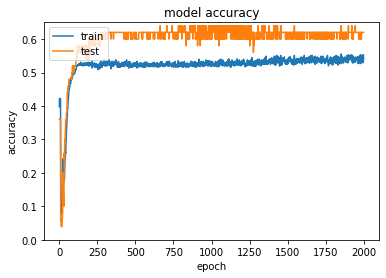

In [32]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0.0,0.65)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [26]:
scores = model.evaluate(X_train, y_train, verbose=0)
print("%s: %.4f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 40.7500%


In [ ]:
print(model.summary())

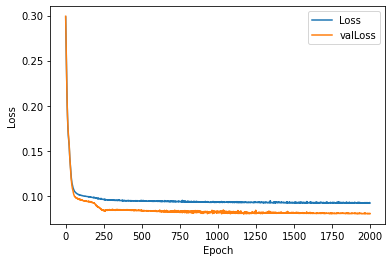

In [33]:
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='valLoss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
prediction = model.predict(X_test) 
print(prediction.shape) 
ypred=prediction
print(ypred.shape)

In [ ]:
ypred
ypred_h=pd.DataFrame(ypred)
ypred_h.hist()
data8.iloc[400:500,:].hist()

In [ ]:
a=ypred[0][0]
b=ypred[0][1]
c=ypred[0][2]
d=ypred[0][3]
e=ypred[0][4]
print(a,b,c,d,e)

In [ ]:
yfit1=a*np.exp(b*x**2-c*x-d)+e

In [ ]:
plt.plot(x, yfit1, color="red", label="y=ax^2+bx+c")